In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### Esercizio 9.1.


Trovare il minimo di una funzione non è un problema banale.
Ci sono diverse tecniche: gradient descent, SGD, simulated annealing.
In questo esercizio si vorrebbe ottimizzare una funzione che, dato un set fissato di punti ordinati, restituisce la somma delle loro distanze.
Tale problema viene definito del **commesso viaggiatore** quando ogni punto rappresenta una città e la funzione costo restituisce la distanza percorsa per attraversarle tutte. In questo viaggio si può visitare ogni città una sola volta per poi tornare al punto di partenza. Definiamo la distanza tra le città
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

con $\vec{x}_{N+1}=\vec{x}_1$.

Per capire l'ordine delle città da attraversare, si utilizza un algoritmo che richiama i meccanismi di selezione, mutazione e riproduzione presenti in natura. <br>
Una volta fissato il numero e le posizioni della città, è possibile introdurre diversi vettori ciascuno dei quali contiene un particolare ordine delle città da visitare. Dal punto di vista degli **algoritmi genetici**, ogni vettore può essere identificato con un genitore che potrà riprodursi. 
Tali percorsi verranno ordinati in base al valore della funzione costo. 
L'operatore di selezione si basa sul campionamento di una distribuzione uniforme nel range $[0; N]$, dove $N$ indica il numero delle città. Il numero estratto verrà elevato ad una certa potenza in modo da rendere più probabile la selezione dei primi elementi, cioè quelli più "forti".
Si selezionano così due vettori che "corrispondono" alla madre a al padre. <br>
L'accoppiamento prevede la creazione di due nuovi figli attraverso un processo mediato dall'operatore di crossover (probabilità del 50%). 
Per concludere si inseriscono diverse mutazioni (ognuna delle quali si verifica con una certa probabilità) in modo tale da poter esplorare il maggior numero di percorsi possibili. <br>
Iterando tale meccanismo, si arriva alla creazione di una nuova generazione. 
Ogni volta che viene creata una nuova generazione si impone la sopravvivenza dell'individuo migliore, cioè il vettore con la minor distanza nell'ensemble di vettori. Tale concetto è definito come "elitismo". <br>
Dopo diverse generazioni, i percorsi migliori potrebbero essere associati alla minor distanza. Uso il condizionale poichè non è garantito che il minimo trovato sia globale. 

### Percorso circolare
Si prova ad applicare tale problema per un numero di città distribuite casualmente sulla circonferenza unitaria.
Il grafico seguente mostra il valore della distanza (lightblue) per i migliori individui di ogni generazione. In un intorno di 100 generazioni, si osserva che il valore della distanza tende verso 2$\pi$. Il valore è corretto poichè in questo caso, il percorso minimo si ha quando il viaggiatore si muove sulla circonferenza.
Si osserva anche un secondo grafico (blue) in cui ogni punto è dato dalla medie di metà delle distanze per ogni generazione.

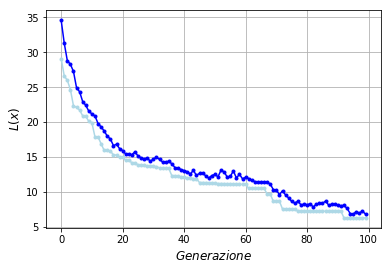

In [14]:
x,y = np.loadtxt("./Circonferenza/LBestPath.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y,marker=".",color="lightblue")
x,y = np.loadtxt("./Circonferenza/L-medie.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y,marker=".", color="blue")
plt.xlabel('$Generazione$',fontsize=12)
plt.ylabel('$L(x)$',fontsize=12)
plt.grid(True)
plt.show()

L'elitismo è fondamentale per la convergenza verso la soluzione. Infatti, togliendo tale opzione, il problema converge ad un valore errato.

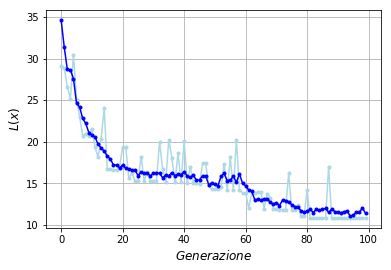

In [13]:
x,y = np.loadtxt("./Circonferenza/NELBestPath.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y,marker=".",color="lightblue")
x,y = np.loadtxt("./Circonferenza/NEL-medie.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y,marker=".", color="blue")
plt.xlabel('$Generazione$',fontsize=12)
plt.ylabel('$L(x)$',fontsize=12)
plt.grid(True)
plt.show()

Le figure sottostanti mostrano il path dopo un determinato numero di generazioni. 
È interessante osservare, grafico dopo grafico, la convergenza dell'algoritmo verso il percorso ottimale.

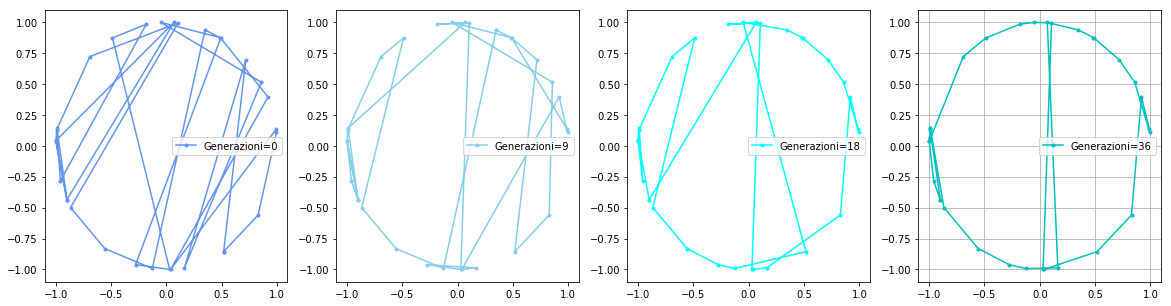

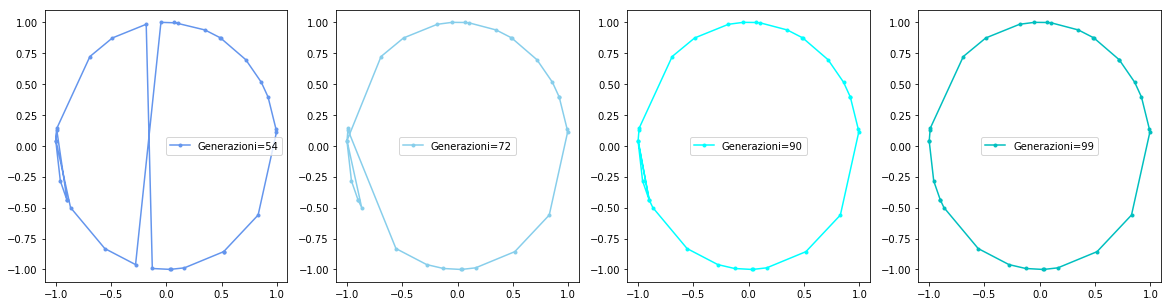

In [20]:
fig, (f1, f2, f3, f4) = plt.subplots(1,4,figsize=(20,5))

x,y = np.loadtxt("./Circonferenza/Configurazioni/configurazione0.dat", usecols=(0,1), unpack='true')
f1.plot(x,y,label='Generazioni=0',marker=".",color="cornflowerblue")
leg = f1.legend();

x,y= np.loadtxt("./Circonferenza/Configurazioni/configurazione9.dat", usecols=(0,1), unpack='true')
f2.plot(x,y, marker=".",label='Generazioni=9',color="skyblue")
leg = f2.legend();

x,y= np.loadtxt("./Circonferenza/Configurazioni/configurazione18.dat", usecols=(0,1), unpack='true')
f3.plot(x,y,marker=".",label='Generazioni=18',color="aqua")
leg = f3.legend();

x,y= np.loadtxt("./Circonferenza/Configurazioni/configurazione36.dat", usecols=(0,1), unpack='true')
f4.plot(x,y,marker=".",label='Generazioni=36',color="c")
leg = f4.legend();
plt.grid(True)
plt.show()

fig, (f5, f6, f7, f8) = plt.subplots(1,4,figsize=(20,5))
x,y = np.loadtxt("./Circonferenza/Configurazioni/configurazione54.dat", usecols=(0,1), unpack='true')
f5.plot(x,y,label='Generazioni=54',marker=".",color="cornflowerblue")
leg = f5.legend();

x,y= np.loadtxt("./Circonferenza/Configurazioni/configurazione72.dat", usecols=(0,1), unpack='true')
f6.plot(x,y, marker=".",label='Generazioni=72',color="skyblue")
leg = f6.legend();

x,y= np.loadtxt("./Circonferenza/Configurazioni/configurazione90.dat", usecols=(0,1), unpack='true')
f7.plot(x,y,marker=".",label='Generazioni=90',color="aqua")
leg = f7.legend();

x,y= np.loadtxt("./Circonferenza/Configurazioni/configurazione99.dat", usecols=(0,1), unpack='true')
f8.plot(x,y,marker=".",label='Generazioni=99',color="c")
leg = f8.legend();

plt.show()

Ripeto lo stesso problema con lo stesso numero di città distribuite casualmente all'interno di un quadrato.
Nel problema precedente era possibile intuire la soluzione mentre in questo direi di no.
Trovata la soluzione non si può quindi affermare se tale minimo è minimo globale. Bisogna utilizzare tecniche più sofisticate come il simulated annealing.

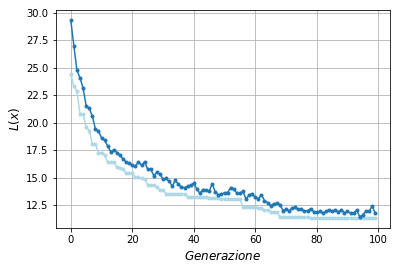

In [16]:
x,y = np.loadtxt("./Quadrato/LBestPath.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y,marker=".",color="lightblue")
x,y = np.loadtxt("./Quadrato/L-medie.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y,marker=".")
plt.xlabel('$Generazione$',fontsize=12)
plt.ylabel('$L(x)$',fontsize=12)
plt.grid(True)
plt.show()

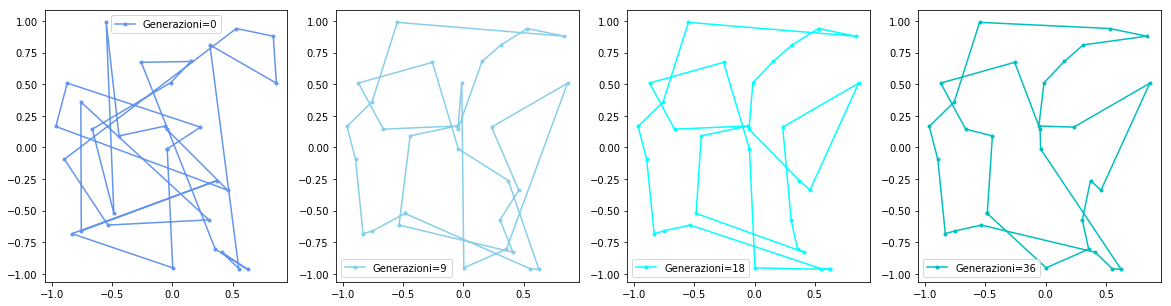

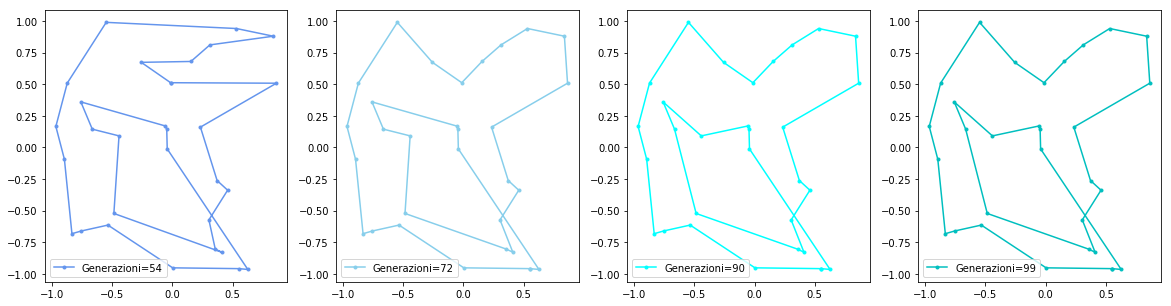

In [19]:
fig, (f1, f2, f3, f4) = plt.subplots(1,4,figsize=(20,5))

x,y = np.loadtxt("./Quadrato/Configurazioni/configurazione0.dat", usecols=(0,1), unpack='true')
f1.plot(x,y,label='Generazioni=0',marker=".",color="cornflowerblue")
leg = f1.legend();

x,y= np.loadtxt("./Quadrato/Configurazioni/configurazione9.dat", usecols=(0,1), unpack='true')
f2.plot(x,y, marker=".",label='Generazioni=9',color="skyblue")
leg = f2.legend();

x,y= np.loadtxt("./Quadrato/Configurazioni/configurazione18.dat", usecols=(0,1), unpack='true')
f3.plot(x,y,marker=".",label='Generazioni=18',color="aqua")
leg = f3.legend();

x,y= np.loadtxt("./Quadrato/Configurazioni/configurazione36.dat", usecols=(0,1), unpack='true')
f4.plot(x,y,marker=".",label='Generazioni=36',color="c")
leg = f4.legend();
plt.show()

fig, (f5, f6, f7, f8) = plt.subplots(1,4,figsize=(20,5))
x,y = np.loadtxt("./Quadrato/Configurazioni/configurazione54.dat", usecols=(0,1), unpack='true')
f5.plot(x,y,label='Generazioni=54',marker=".",color="cornflowerblue")
leg = f5.legend();

x,y= np.loadtxt("./Quadrato/Configurazioni/configurazione72.dat", usecols=(0,1), unpack='true')
f6.plot(x,y, marker=".",label='Generazioni=72',color="skyblue")
leg = f6.legend();

x,y= np.loadtxt("./Quadrato/Configurazioni/configurazione90.dat", usecols=(0,1), unpack='true')
f7.plot(x,y,marker=".",label='Generazioni=90',color="aqua")
leg = f7.legend();

x,y= np.loadtxt("./Quadrato/Configurazioni/configurazione99.dat", usecols=(0,1), unpack='true')
f8.plot(x,y,marker=".",label='Generazioni=99',color="c")
leg = f8.legend();

plt.show()